# Classificação de Bons e Maus Pagadores

Um cliente do setor financeiro forneceu um conjunto de dados contendo informações de diferentes clientes, com o objetivo de identificar bons e maus pagadores. Cada registro do dataset representa um cliente, descrito por diversas variáveis que indicam características financeiras e comportamentais, além da indicação se o cliente é um bom pagador (classe 0) ou mau pagador (classe 1).

O cliente precisa de uma solução automatizada para classificar novos clientes em bons ou maus pagadores de forma eficaz, para otimizar processos de concessão de crédito e minimizar riscos financeiros.

Por se tratar de decisões que envolvem dinheiro real e impacto direto nas operações da empresa, a solução deve atender aos seguintes requisitos essenciais:

- **Desempenho preditivo confiável:** o modelo deve apresentar bom desempenho para garantir decisões adequadas em dados futuros.
- **Interpretabilidade:** o cliente exige que a solução seja compreensível, de modo que os analistas possam identificar quais características influenciam as decisões e justificar os resultados internamente e para órgãos reguladores.
- **Automação:** o processo deve ser automatizado, abrangendo desde o pré-processamento dos dados até a seleção das variáveis mais relevantes e a construção do modelo final.

Sua tarefa é desenvolver uma solução automatizada que atenda a esses objetivos.

A solução entregue deve conter código completo, organizado e documentado, facilitando sua integração ao fluxo operacional do cliente.


<Axes: >

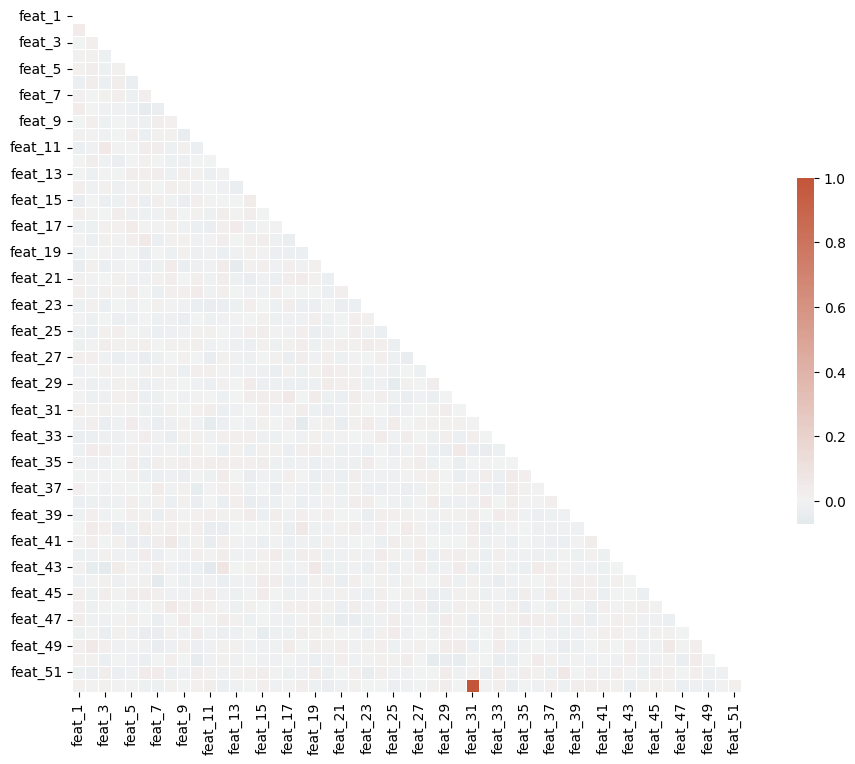

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("dados.csv", index_col="Unnamed: 0")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr, 
    mask=mask, 
    cmap=cmap, 
    # vmax=.3, 
    center=0,
    square=True, 
    linewidths=.5, 
    cbar_kws={"shrink": .5}
)


In [14]:
import pandas as pd
import numpy as np
import altair as alt

# Carregar os dados
df = pd.read_csv("dados.csv", index_col="Unnamed: 0")

# Calcular a matriz de correlação de Spearman
corr = df.corr(method='spearman')

# Transformar a matriz de correlação em formato "long"
corr_melted = (
    corr
    .reset_index()
    .melt(id_vars='index')
    .rename(columns={'index': 'Variable1', 'variable': 'Variable2', 'value': 'Correlation'})
)

# Para criar um efeito de máscara (primeiro triângulo), podemos filtrar onde a posição é maior que a outra
corr_melted['Variable1_idx'] = corr_melted['Variable1'].astype('category').cat.codes
corr_melted['Variable2_idx'] = corr_melted['Variable2'].astype('category').cat.codes

# Adiciona uma coluna para o filtro do triângulo superior (como na máscara do seaborn)
corr_melted = corr_melted[
    corr_melted['Variable1_idx'] > corr_melted['Variable2_idx']
]

# Criar o gráfico de heatmap com Altair
heatmap = alt.Chart(corr_melted).mark_rect().encode(
    x=alt.X('Variable2:N', title=''),
    y=alt.Y('Variable1:N', title=''),
    color=alt.Color('Correlation:Q', 
                    scale=alt.Scale(scheme='blueorange', domain=[-1,1]),
                    title='Spearman correlation'),
    tooltip=['Variable1', 'Variable2', 'Correlation']
).properties(
    width=600,
    height=600
)

heatmap.show()

alt.Chart(...)